In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import spotipy
from spotipy import Spotify
from spotipy.oauth2 import SpotifyOAuth
from spotipy.oauth2 import SpotifyClientCredentials
import time
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import tree
import os

sns.set()  

In [ ]:
SPOTIPY_CLIENT_ID = '7e7576ddd8d2451fa2c4e86897c3b686'
SPOTIPY_CLIENT_SECRET = '6c7fe3b525be4b6598ffeebcff00f156'
SPOTIPY_REDIRECT_URI = 'http://localhost:3000'

if os.path.exists('.cache'):
    os.remove('.cache')


sp_oauth = SpotifyOAuth(client_id=SPOTIPY_CLIENT_ID,
                        client_secret=SPOTIPY_CLIENT_SECRET,
                        redirect_uri=SPOTIPY_REDIRECT_URI)

In [ ]:

token_info = sp_oauth.get_access_token()
access_token = token_info['access_token']


sp = Spotify(auth=access_token)

In [ ]:
tracks = []
max_offset = 1000
limit = 50
for i in range(0, max_offset, limit):
    time.sleep(10)
    track_results = sp.search(q='year:2021', type='track', limit=limit, offset=i, market='US')
    tracks.extend(track_results['tracks']['items'])
    

tracks = sorted(tracks, key=lambda x: x['popularity'], reverse=True)
            

top_tracks = tracks[:1000]

data3 = {
    'artist_name': [],
    'track_name': [],
    'track_id': [],
    'popularity': [],
    'album_name': [],
    'album_id': [],
    'album_release_date': [],
    'album_type': [],
#     'album_cover_url': [],
    'track_duration_ms': [],
    'explicit': [],
    'track_number': [],
    'disc_number': [],
#     'track_preview_url': [],
#     'track_uri': [],
    'danceability': [],
    'energy': [],
    'key': [],
    'loudness': [],
    'mode': [],
    'speechiness': [],
    'acousticness': [],
    'instrumentalness': [],
    'liveness': [],
    'valence': [],
    'tempo': [],
    'artist_id': [],
    'artist_uri': [],
    'artist_genres': [],
    'artist_popularity': []
}

for t in top_tracks:
    track_id = t['id']
    artist_id = t['artists'][0]['id']
    audio_features = sp.audio_features(track_id)
    if None not in audio_features and len(audio_features) > 0:  # Check if audio_features is not None and not empty
        audio_features = audio_features[0]  # Extract the first item from the list
        artist_info = sp.artist(artist_id)
        data3['artist_name'].append(t['artists'][0]['name'])
        data3['track_name'].append(t['name'])
        data3['track_id'].append(track_id)
        data3['popularity'].append(t['popularity'])
        data3['album_name'].append(t['album']['name'])
        data3['album_id'].append(t['album']['id'])
        data3['album_release_date'].append(t['album']['release_date'])
        data3['album_type'].append(t['album']['album_type'])
#         data3['album_cover_url'].append(t['album']['images'][0]['url'])
        data3['track_duration_ms'].append(t['duration_ms'])
        data3['explicit'].append(t['explicit'])
        data3['track_number'].append(t['track_number'])
        data3['disc_number'].append(t['disc_number'])
#         data3['track_preview_url'].append(t['preview_url'])
#         data3['track_uri'].append(t['uri'])
        data3['danceability'].append(audio_features['danceability'])
        data3['energy'].append(audio_features['energy'])
        data3['key'].append(audio_features['key'])
        data3['loudness'].append(audio_features['loudness'])
        data3['mode'].append(audio_features['mode'])
        data3['speechiness'].append(audio_features['speechiness'])
        data3['acousticness'].append(audio_features['acousticness'])
        data3['instrumentalness'].append(audio_features['instrumentalness'])
        data3['liveness'].append(audio_features['liveness'])
        data3['valence'].append(audio_features['valence'])
        data3['tempo'].append(audio_features['tempo'])
        data3['artist_id'].append(artist_id)
        data3['artist_uri'].append(t['artists'][0]['uri'])
        data3['artist_genres'].append(artist_info['genres'])
        data3['artist_popularity'].append(artist_info['popularity'])
    else:
        # Handle the case where audio_features is None or empty
        print('No audio features found for track')

# df1 = pd.DataFrame(data2)
# print(df1.head())

In [ ]:
df21 = pd.DataFrame(data3)
print(df21.head())


file_path = '/Users/ellathomasson/Downloads/tracks2021.csv'


df21.to_csv(file_path, index=False)  

print("DataFrame saved as CSV successfully.")

In [ ]:
tracks = []
max_offset = 1000
limit = 50
for i in range(0, max_offset, limit):
    time.sleep(10)
    track_results = sp.search(q='year:2022', type='track', limit=limit, offset=i, market='US')
    tracks.extend(track_results['tracks']['items'])
    

tracks = sorted(tracks, key=lambda x: x['popularity'], reverse=True)
            

top_tracks = tracks[:1000]

data2 = {
    'artist_name': [],
    'track_name': [],
    'track_id': [],
    'popularity': [],
    'album_name': [],
    'album_id': [],
    'album_release_date': [],
    'album_type': [],
#     'album_cover_url': [],
    'track_duration_ms': [],
    'explicit': [],
    'track_number': [],
    'disc_number': [],
#     'track_preview_url': [],
#     'track_uri': [],
    'danceability': [],
    'energy': [],
    'key': [],
    'loudness': [],
    'mode': [],
    'speechiness': [],
    'acousticness': [],
    'instrumentalness': [],
    'liveness': [],
    'valence': [],
    'tempo': [],
    'artist_id': [],
    'artist_uri': [],
    'artist_genres': [],
    'artist_popularity': []
}

for t in top_tracks:
    track_id = t['id']
    artist_id = t['artists'][0]['id']
    audio_features = sp.audio_features(track_id)
    if None not in audio_features and len(audio_features) > 0:  # Check if audio_features is not None and not empty
        audio_features = audio_features[0]  # Extract the first item from the list
        artist_info = sp.artist(artist_id)
        data2['artist_name'].append(t['artists'][0]['name'])
        data2['track_name'].append(t['name'])
        data2['track_id'].append(track_id)
        data2['popularity'].append(t['popularity'])
        data2['album_name'].append(t['album']['name'])
        data2['album_id'].append(t['album']['id'])
        data2['album_release_date'].append(t['album']['release_date'])
        data2['album_type'].append(t['album']['album_type'])
#         data2['album_cover_url'].append(t['album']['images'][0]['url'])
        data2['track_duration_ms'].append(t['duration_ms'])
        data2['explicit'].append(t['explicit'])
        data2['track_number'].append(t['track_number'])
        data2['disc_number'].append(t['disc_number'])
#         data2['track_preview_url'].append(t['preview_url'])
#         data2['track_uri'].append(t['uri'])
        data2['danceability'].append(audio_features['danceability'])
        data2['energy'].append(audio_features['energy'])
        data2['key'].append(audio_features['key'])
        data2['loudness'].append(audio_features['loudness'])
        data2['mode'].append(audio_features['mode'])
        data2['speechiness'].append(audio_features['speechiness'])
        data2['acousticness'].append(audio_features['acousticness'])
        data2['instrumentalness'].append(audio_features['instrumentalness'])
        data2['liveness'].append(audio_features['liveness'])
        data2['valence'].append(audio_features['valence'])
        data2['tempo'].append(audio_features['tempo'])
        data2['artist_id'].append(artist_id)
        data2['artist_uri'].append(t['artists'][0]['uri'])
        data2['artist_genres'].append(artist_info['genres'])
        data2['artist_popularity'].append(artist_info['popularity'])
    else:

        print('No audio features found for track')

# df1 = pd.DataFrame(data2)
# print(df1.head())

In [ ]:
df22 = pd.DataFrame(data2)
# print(df_2022.head())


file_path = '/Users/ellathomasson/Downloads/tracks2022.csv'

df22.to_csv(file_path, index=False)  # Set index=False if you don't want to include row indices in the CSV

print("DataFrame saved as CSV successfully.")



In [ ]:
tracks = []
max_offset = 1000
limit = 50
for i in range(0, max_offset, limit):
    time.sleep(10)
    track_results = sp.search(q='year:2020', type='track', limit=limit, offset=i, market='US')
    tracks.extend(track_results['tracks']['items'])
    

tracks = sorted(tracks, key=lambda x: x['popularity'], reverse=True)
            

top_tracks = tracks[:1000]

data = {
    'artist_name': [],
    'track_name': [],
    'track_id': [],
    'popularity': [],
    'album_name': [],
    'album_id': [],
    'album_release_date': [],
    'album_type': [],
    'album_cover_url': [],
    'track_duration_ms': [],
    'explicit': [],
    'track_number': [],
    'disc_number': [],
    'track_preview_url': [],
    'track_uri': [],
    'danceability': [],
    'energy': [],
    'key': [],
    'loudness': [],
    'mode': [],
    'speechiness': [],
    'acousticness': [],
    'instrumentalness': [],
    'liveness': [],
    'valence': [],
    'tempo': [],
    'artist_id': [],
    'artist_uri': [],
    'artist_genres': [],
    'artist_popularity': []
}

for t in top_tracks:
    track_id = t['id']
    artist_id = t['artists'][0]['id']
    audio_features = sp.audio_features(track_id)
    if None not in audio_features and len(audio_features) > 0:  # Check if audio_features is not None and not empty
        audio_features = audio_features[0]  # Extract the first item from the list
        artist_info = sp.artist(artist_id)
        data['artist_name'].append(t['artists'][0]['name'])
        data['track_name'].append(t['name'])
        data['track_id'].append(track_id)
        data['popularity'].append(t['popularity'])
        data['album_name'].append(t['album']['name'])
        data['album_id'].append(t['album']['id'])
        data['album_release_date'].append(t['album']['release_date'])
        data['album_type'].append(t['album']['album_type'])
#         data['album_cover_url'].append(t['album']['images'][0]['url'])
        data['track_duration_ms'].append(t['duration_ms'])
        data['explicit'].append(t['explicit'])
        data['track_number'].append(t['track_number'])
        data['disc_number'].append(t['disc_number'])
#         data['track_preview_url'].append(t['preview_url'])
#         data['track_uri'].append(t['uri'])
        data['danceability'].append(audio_features['danceability'])
        data['energy'].append(audio_features['energy'])
        data['key'].append(audio_features['key'])
        data['loudness'].append(audio_features['loudness'])
        data['mode'].append(audio_features['mode'])
        data['speechiness'].append(audio_features['speechiness'])
        data['acousticness'].append(audio_features['acousticness'])
        data['instrumentalness'].append(audio_features['instrumentalness'])
        data['liveness'].append(audio_features['liveness'])
        data['valence'].append(audio_features['valence'])
        data['tempo'].append(audio_features['tempo'])
        data['artist_id'].append(artist_id)
        data['artist_uri'].append(t['artists'][0]['uri'])
        data['artist_genres'].append(artist_info['genres'])
        data['artist_popularity'].append(artist_info['popularity'])
    else:
        print('No audio features found for track')

# df1 = pd.DataFrame(data)
# print(df1.head())

In [ ]:
tracks = []
max_offset = 1000
limit = 50
for i in range(0, max_offset, limit):
    time.sleep(10)
    track_results = sp.search(q='year:2022', type='track', limit=limit, offset=i, market='US')
    tracks.extend(track_results['tracks']['items'])
    
tracks = sorted(tracks, key=lambda x: x['popularity'], reverse=True)
            
top_tracks = tracks[:1000]

data = {
    'artist_name': [],
    'track_name': [],
    'track_id': [],
    'popularity': [],
    'album_name': [],
    'album_id': [],
    'album_release_date': [],
    'album_type': [],
#     'album_cover_url': [],
    'track_duration_ms': [],
    'explicit': [],
    'track_number': [],
    'disc_number': [],
#     'track_preview_url': [],
#     'track_uri': [],
    'danceability': [],
    'energy': [],
    'key': [],
    'loudness': [],
    'mode': [],
    'speechiness': [],
    'acousticness': [],
    'instrumentalness': [],
    'liveness': [],
    'valence': [],
    'tempo': [],
    'artist_id': [],
    'artist_uri': [],
    'artist_genres': [],
    'artist_popularity': []
}

for t in top_tracks:
    track_id = t['id']
    artist_id = t['artists'][0]['id']
    audio_features = sp.audio_features(track_id)
    if None not in audio_features and len(audio_features) > 0:  # Check if audio_features is not None and not empty
        audio_features = audio_features[0]  # Extract the first item from the list
        artist_info = sp.artist(artist_id)
        data['artist_name'].append(t['artists'][0]['name'])
        data['track_name'].append(t['name'])
        data['track_id'].append(track_id)
        data['popularity'].append(t['popularity'])
        data['album_name'].append(t['album']['name'])
        data['album_id'].append(t['album']['id'])
        data['album_release_date'].append(t['album']['release_date'])
        data['album_type'].append(t['album']['album_type'])
#         data['album_cover_url'].append(t['album']['images'][0]['url'])
        data['track_duration_ms'].append(t['duration_ms'])
        data['explicit'].append(t['explicit'])
        data['track_number'].append(t['track_number'])
        data['disc_number'].append(t['disc_number'])
#         data['track_preview_url'].append(t['preview_url'])
#         data['track_uri'].append(t['uri'])
        data['danceability'].append(audio_features['danceability'])
        data['energy'].append(audio_features['energy'])
        data['key'].append(audio_features['key'])
        data['loudness'].append(audio_features['loudness'])
        data['mode'].append(audio_features['mode'])
        data['speechiness'].append(audio_features['speechiness'])
        data['acousticness'].append(audio_features['acousticness'])
        data['instrumentalness'].append(audio_features['instrumentalness'])
        data['liveness'].append(audio_features['liveness'])
        data['valence'].append(audio_features['valence'])
        data['tempo'].append(audio_features['tempo'])
        data['artist_id'].append(artist_id)
        data['artist_uri'].append(t['artists'][0]['uri'])
        data['artist_genres'].append(artist_info['genres'])
        data['artist_popularity'].append(artist_info['popularity'])
    else:
        print('No audio features found for track')

# df1 = pd.DataFrame(data2)
# print(df1.head())

In [ ]:

lengths = {key: len(value) for key, value in data.items()}
# print(lengths)

keys_to_remove = ['album_cover_url', 'track_preview_url', 'track_uri']
filtered_data = {key: value for key, value in data.items() if key not in keys_to_remove}

lengths2 = {key: len(value) for key, value in filtered_data.items()}

# print(lengths2)

df_2022 = pd.DataFrame(filtered_data)
# print(df_2022.head(10))

# df_2022.shape

df_2022_ = df_2022.drop(index=df_2022.index[:997])

df_2022_.reset_index(drop=True, inplace=True)

# print(df_2022_.head())

# df_2022_.shape

file_path = '/Users/ellathomasson/Downloads/tracks2022.csv'

df_2022_.to_csv(file_path, index=False)  # Set index=False if you don't want to include row indices in the CSV

print("DataFrame saved as CSV successfully.")




In [3]:
### READING IN ALL DATA

df_2016 = pd.read_csv("/Users/ellathomasson/Downloads/tracks2016.csv")
df_2017 = pd.read_csv("/Users/ellathomasson/Downloads/tracks2017.csv")
df_2018 = pd.read_csv("/Users/ellathomasson/Downloads/tracks2018.csv")
df_2019 = pd.read_csv("/Users/ellathomasson/Downloads/tracks2019.csv")
df_2020 = pd.read_csv("/Users/ellathomasson/Downloads/tracks2020.csv")
df_2021 = pd.read_csv("/Users/ellathomasson/Downloads/tracks2021.csv")
df_2022 = pd.read_csv("/Users/ellathomasson/Downloads/tracks2022.csv")


In [4]:
columns_to_remove = ['Unnamed: 0', 'album_cover_url', 'track_preview_url', 'track_uri']


for df in [df_2016, df_2017, df_2018, df_2019]:
    df.drop(columns=columns_to_remove, inplace=True, errors='ignore')

df_2016['year'] = 2016
df_2017['year'] = 2017
df_2018['year'] = 2018
df_2019['year'] = 2019
df_2020['year'] = 2020
df_2021['year'] = 2021
df_2022['year'] = 2022


stacked_df = pd.concat([df_2016, df_2017, df_2018, df_2019, df_2020, df_2021, df_2022], ignore_index=True)    



In [5]:
stacked_df.shape

(6977, 28)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import numpy as np
from sklearn.preprocessing import StandardScaler

X = stacked_df[["valence", "loudness", "energy", "speechiness", "tempo", "instrumentalness", "acousticness", "key", "mode", "liveness"]]
y = stacked_df['danceability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

scaler_X = StandardScaler()
scaler_y = StandardScaler()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()



In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=2)  

model.fit(X_train, y_train)

y_model = model.predict(X_test)

print(y_model)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_model)
mse = mean_squared_error(y_test, y_model)
rmse = mean_squared_error(y_test, y_model, squared=False)  # squared=False to get RMSE
r2 = r2_score(y_test, y_model)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

In [ ]:
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importances_sorted = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances_sorted)

In [ ]:
from sklearn import model_selection
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


param_grid = {
    'C': [1, 10, 100, 1000],
    'gamma': [0.001, 0.01, 0.1, 1],
    'epsilon': [0.01, 0.1, 0.2, 0.5],
    'kernel': ['rbf']
}

grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train_scaled, y_train_scaled)
print("Best parameters found: ", grid_search.best_params_)

best_svr = grid_search.best_estimator_
best_svr.fit(X_train_scaled, y_train_scaled)


y_pred_scaled = best_svr.predict(X_test_scaled)

y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Root Mean Squared Error: ", mse**0.5)


In [ ]:
## random forest model for album_type

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


X = stacked_df[["valence", "loudness", "energy", "speechiness", "tempo", "instrumentalness", "acousticness", "key", "mode", "liveness"]]
y = stacked_df['album_type']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=2)


model = RandomForestClassifier(random_state=2)  

model.fit(X_train2, y_train2)

y_model = model.predict(X_test2)

print(y_model)


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test2, y_model)

In [ ]:
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importances_sorted = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances_sorted)

In [40]:
## Random forest for explicit

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# stacked_df['year_int'] = stacked_df['year'].astype(int)

X = stacked_df[["valence", "loudness", "energy", "speechiness", "tempo", "instrumentalness", "acousticness", "key", "liveness", "track_duration_ms","year_int"]]
y = stacked_df['explicit']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


model = RandomForestClassifier(random_state=2)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print(y_pred)

# stacked_df.columns


[False False False ... False False False]


In [41]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_score(y_test, y_pred)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1) 

Accuracy: 0.9340974212034384
Precision: 0.8018867924528302
Recall: 0.5448717948717948
F1-score: 0.648854961832061


In [39]:
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importances_sorted = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances_sorted)

              Feature  Importance
3         speechiness    0.229217
5    instrumentalness    0.121421
2              energy    0.081695
11       danceability    0.081272
1            loudness    0.081113
6        acousticness    0.078561
0             valence    0.077953
9   track_duration_ms    0.075600
4               tempo    0.056510
8            liveness    0.054506
7                 key    0.031324
10           year_int    0.030829


In [ ]:
## for the logistic model 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


X = stacked_df[["valence", "loudness", "energy", "speechiness", "tempo", "instrumentalness", "acousticness", "key", "mode", "liveness"]]
y = stacked_df['explicit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

logistic_model = LogisticRegression(random_state=2)
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


print(classification_report(y_test, y_pred))


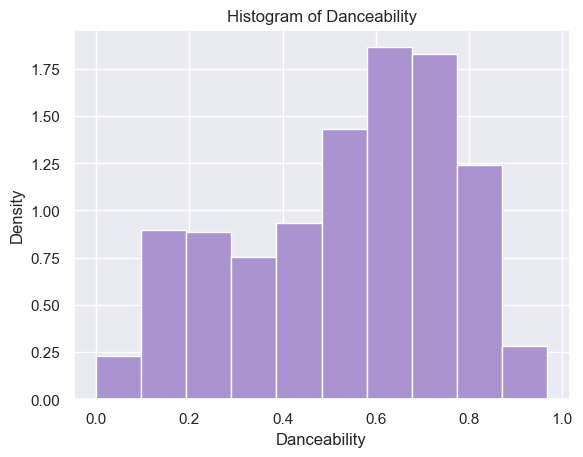

In [7]:
import matplotlib.pyplot as plt

plt.hist(stacked_df['danceability'], density=True, color='#aa93d0')
plt.xlabel('Danceability')
plt.ylabel('Density')
plt.title('Histogram of Danceability')
plt.show()


In [ ]:
plt.hist(stacked_df['artist_popularity'], density=True, alpha=0.5)

In [ ]:
sns.kdeplot(data=stacked_df['danceability'], fill=True);

In [ ]:
grid = sns.FacetGrid(stacked_df, row="album_type", col="explicit", margin_titles=True)
grid.map(plt.hist, "danceability", bins=np.linspace(0, 1, num=20));

In [ ]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="album_type", y="danceability", hue="explicit", data=stacked_df, kind="box")
    g.set_axis_labels("Album Type", "Danceability");

In [ ]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="album_type", y="danceability", hue="explicit", data=stacked_df, kind="box")
    g.set_axis_labels("Album Type", "Danceability");

In [ ]:
with sns.axes_style('white'):
    sns.jointplot(x="valence", y="danceability", data=stacked_df, kind='hex')

In [ ]:
sns.jointplot(x="valence", y="danceability", data=stacked_df, kind='reg');

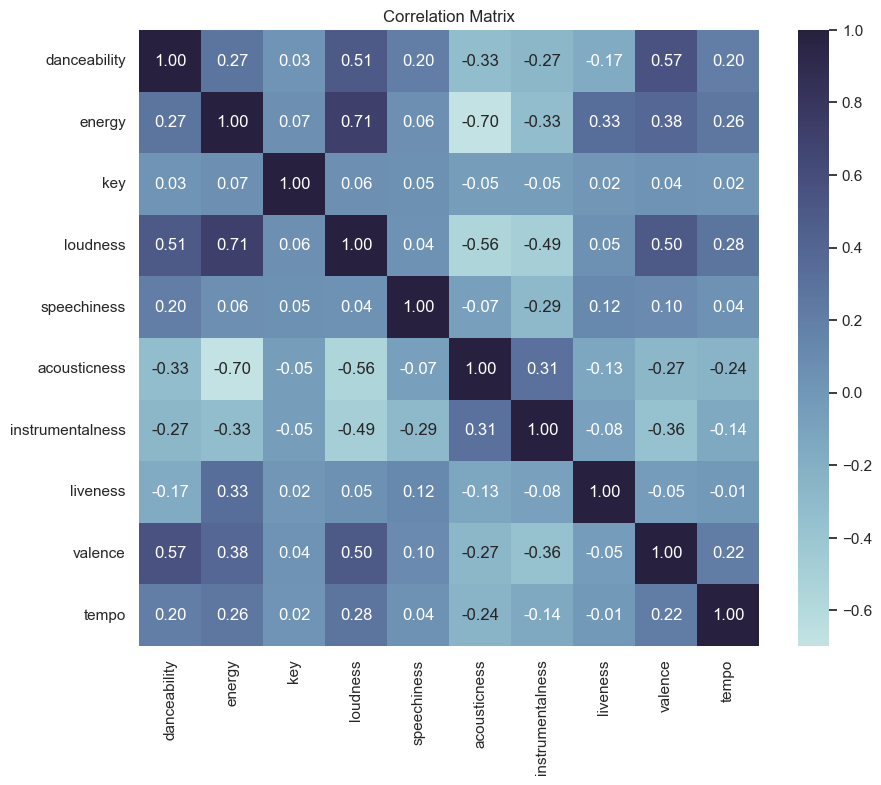

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


custom_cmap = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)

subset_df = stacked_df[['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
correlation_matrix = subset_df.corr()

plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap=custom_cmap, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# custom_cmap = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)

# data = np.random.rand(10, 10)

# plt.figure(figsize=(8, 6))

# sns.heatmap(data, cmap=custom_cmap, annot=True, fmt=".2f")
# plt.title('Custom Colormap Heatmap with Numbers')
# plt.show()

In [ ]:
sns.jointplot(x="loudness", y="danceability", data=stacked_df, kind='reg');

In [ ]:
with sns.axes_style('white'):
    sns.jointplot(x="loudness", y="danceability", data=stacked_df, kind='hex')

In [ ]:
with sns.axes_style('white'):
    sns.jointplot(x="loudness", y="energy", data=stacked_df, kind='hex')

In [ ]:
print(sum(stacked_df['explicit'] == True))
print(sum(stacked_df['explicit'] == False))

In [ ]:
sns.boxplot(x='explicit', y='speechiness', data=stacked_df)
plt.title('Boxplot of Valence by Explicit')
plt.xlabel('Explicit')
plt.ylabel('Valence')
plt.show()


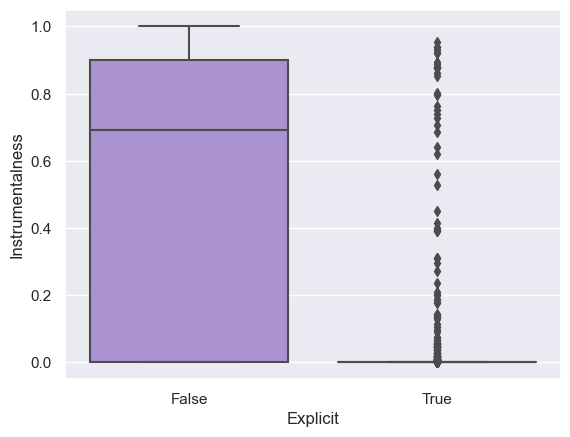

In [41]:
sns.boxplot(x='explicit', y='instrumentalness', data=stacked_df, 
            boxprops=dict(facecolor='#aa93d0'))
plt.xlabel('Explicit')
plt.ylabel('Instrumentalness')
plt.show()


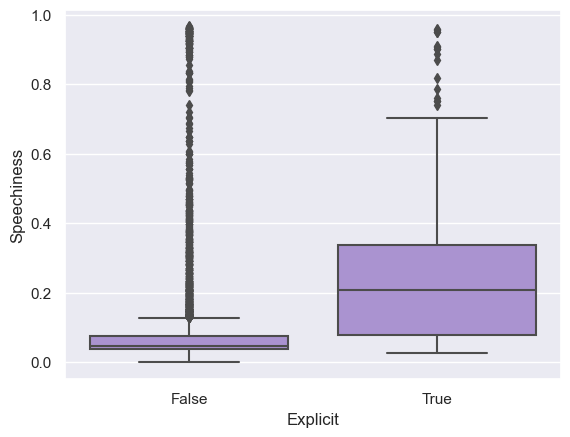

In [35]:
sns.boxplot(x='explicit', y='speechiness', data=stacked_df, 
            boxprops=dict(facecolor='#aa93d0'))
plt.xlabel('Explicit')
plt.ylabel('Speechiness')
plt.show()

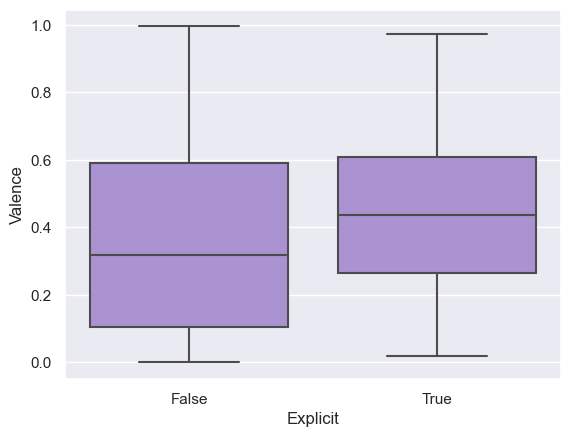

In [39]:
sns.boxplot(x='explicit', y='valence', data=stacked_df, 
            boxprops=dict(facecolor='#aa93d0'))
plt.xlabel('Explicit')
plt.ylabel('Valence')
plt.show()

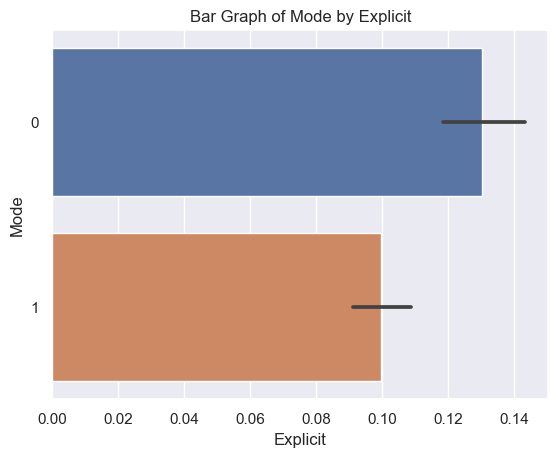

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

stacked_df['mode'] = stacked_df['mode'].astype('category')

sns.barplot(x='explicit', y='mode', data=stacked_df)
plt.title('Bar Graph of Mode by Explicit')
plt.xlabel('Explicit')
plt.ylabel('Mode')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for danceability
plt.subplot(4, 3, 1)
sns.boxplot(x='explicit', y='danceability', data=stacked_df)
plt.title('Boxplot of Danceability by Explicit')
plt.xlabel('Explicit')
plt.ylabel('Danceability')

# Boxplot for energy
plt.subplot(4, 3, 2)
sns.boxplot(x='explicit', y='energy', data=stacked_df)
plt.title('Boxplot of Energy by Explicit')
plt.xlabel('Explicit')
plt.ylabel('Energy')

# Boxplot for key
plt.subplot(4, 3, 3)
sns.boxplot(x='explicit', y='key', data=stacked_df)
plt.title('Boxplot of Key by Explicit')
plt.xlabel('Explicit')
plt.ylabel('Key')

# Boxplot for loudness
plt.subplot(4, 3, 4)
sns.boxplot(x='explicit', y='loudness', data=stacked_df)
plt.title('Boxplot of Loudness by Explicit')
plt.xlabel('Explicit')
plt.ylabel('Loudness')

plt.subplot(4, 3, 5)
sns.barplot(x='explicit', y='mode', data=stacked_df)
plt.title('Bar Graph of Mode by Explicit')
plt.xlabel('Explicit')
plt.ylabel('Mode')

# Boxplot for speechiness
plt.subplot(4, 3, 6)
sns.boxplot(x='explicit', y='speechiness', data=stacked_df)
plt.title('Boxplot of Speechiness by Explicit')
plt.xlabel('Explicit')
plt.ylabel('Speechiness')

# Boxplot for acousticness
plt.subplot(4, 3, 7)
sns.boxplot(x='explicit', y='acousticness', data=stacked_df)
plt.title('Boxplot of Acousticness by Explicit')
plt.xlabel('Explicit')
plt.ylabel('Acousticness')

# Boxplot for instrumentalness
plt.subplot(4, 3, 8)
sns.boxplot(x='explicit', y='instrumentalness', data=stacked_df)
plt.title('Boxplot of Instrumentalness by Explicit')
plt.xlabel('Explicit')
plt.ylabel('Instrumentalness')

# Boxplot for liveness
plt.subplot(4, 3, 9)
sns.boxplot(x='explicit', y='liveness', data=stacked_df)
plt.title('Boxplot of Liveness by Explicit')
plt.xlabel('Explicit')
plt.ylabel('Liveness')

# Boxplot for valence
plt.subplot(4, 3, 10)
sns.boxplot(x='explicit', y='valence', data=stacked_df)
plt.title('Boxplot of Valence by Explicit')
plt.xlabel('Explicit')
plt.ylabel('Valence')

# Boxplot for tempo
plt.subplot(4, 3, 11)
sns.boxplot(x='explicit', y='tempo', data=stacked_df)
plt.title('Boxplot of Tempo by Explicit')
plt.xlabel('Explicit')
plt.ylabel('Tempo')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()






In [ ]:
sns.boxplot(x='explicit', y='loudness', data=stacked_df)
plt.title('Boxplot of Loudness by Explicit')
plt.xlabel('Explicit')
plt.ylabel('Loudness')
plt.show()

In [7]:
print(sum(stacked_df['explicit'] == False))
print(sum(stacked_df['explicit'] == True))

6198
779


In [8]:
779/6198

0.12568570506615037

In [9]:
779/(779+6198)

0.11165257273899958

In [10]:
6198/(779+6198)

0.8883474272610005